# SELECCION DE DATA

In [2]:
import pandas as pd #Manipulación de datos
import numpy as np #Calculos de Matrices y Vectores
import matplotlib.pyplot as pt #Creación de Gráficos
import requests as rq #Manejo y Capturacion de datos Html
import os #Manejo de Archivos Drive

In [3]:
pd.set_option("display.precision",2)

In [4]:
import sys

if 'google.colab' in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')
  dir = '/content/drive/MyDrive/ESIS_2024/7mo_semestre/Analitica_Datos/UNID02/TrabajoUnidad02/Data/bank'
else:
  dir = './Data/bank/'
  
os.listdir(dir)

['bank-full.csv',
 'bank-names.txt',
 'bank.csv',
 'bank-full-trad.xlsx',
 'bank-full.xlsx',
 'bank-full-trad-num.xlsx',
 '~$bank-full-trad.xlsx']

In [5]:
archivo = f'{dir}bank-full-trad.xlsx'
data_xls = pd.read_excel(archivo, sheet_name='bank-full')

# ANÁLISIS BÁSICOS

In [6]:
data_xls.head(5)

,edad,trabajo,estado_civil,educacion,incumplimiento,balance,pres_vivienda,pres_personal,contacto,dia,mes,duracion_seg,campania,pdias,anterior,presultado,y
0,58,gerente,casado,superior,no,2143,si,no,desconocido,5,may,261,1,-1,0,desconocido,no
1,44,técnico,soltero,secundario,no,29,si,no,desconocido,5,may,151,1,-1,0,desconocido,no
2,33,empresario,casado,secundario,no,2,si,si,desconocido,5,may,76,1,-1,0,desconocido,no
3,47,obrero,casado,desconocido,no,1506,si,no,desconocido,5,may,92,1,-1,0,desconocido,no
4,33,desconocido,soltero,desconocido,no,1,no,no,desconocido,5,may,198,1,-1,0,desconocido,no


In [7]:
data_xls.shape  # Devuelve Filas y Columnas

(45211, 17)

In [8]:
data_xls.columns

Index(['edad', 'trabajo', 'estado_civil', 'educacion', 'incumplimiento',
       'balance', 'pres_vivienda', 'pres_personal', 'contacto', 'dia', 'mes',
       'duracion_seg', 'campania', 'pdias', 'anterior', 'presultado', 'y'],
      dtype='object')

In [9]:
data_xls.info() # Devuelve Información de las Columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   edad            45211 non-null  int64 
 1   trabajo         45211 non-null  object
 2   estado_civil    45211 non-null  object
 3   educacion       45211 non-null  object
 4   incumplimiento  45211 non-null  object
 5   balance         45211 non-null  int64 
 6   pres_vivienda   45211 non-null  object
 7   pres_personal   45211 non-null  object
 8   contacto        45211 non-null  object
 9   dia             45211 non-null  int64 
 10  mes             45211 non-null  object
 11  duracion_seg    45211 non-null  int64 
 12  campania        45211 non-null  int64 
 13  pdias           45211 non-null  int64 
 14  anterior        45211 non-null  int64 
 15  presultado      45211 non-null  object
 16  y               45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
data_xls.describe() # Devuelve Estadisticas de las Columnas

,edad,balance,dia,duracion_seg,campania,pdias,anterior
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [11]:
data_xls.loc[ (data_xls['y']=='si') & (data_xls['edad'] > 60) & (data_xls['presultado']=='fracaso')]


,edad,trabajo,estado_civil,educacion,incumplimiento,balance,pres_vivienda,pres_personal,contacto,dia,mes,duracion_seg,campania,pdias,anterior,presultado,y
40363,83,jubilado,casado,primario,no,425,no,no,telefono,22,jun,883,1,140,1,fracaso,si
40886,61,gerente,soltero,superior,no,2,no,no,celular,12,ago,131,1,114,3,fracaso,si
40987,76,jubilado,casado,primario,no,3324,no,no,celular,13,ago,227,2,192,1,fracaso,si
41506,79,jubilado,casado,secundario,no,723,no,no,telefono,9,sep,276,1,79,3,fracaso,si
41841,75,jubilado,casado,secundario,no,3771,no,no,telefono,16,oct,186,1,183,1,fracaso,si
41858,73,jubilado,casado,desconocido,no,519,no,no,telefono,16,oct,434,1,57,1,fracaso,si
41959,73,jubilado,casado,primario,no,796,no,no,celular,23,oct,427,1,182,2,fracaso,si
41979,73,jubilado,casado,primario,no,542,no,no,celular,26,oct,355,1,180,5,fracaso,si
42053,66,jubilado,casado,superior,no,1948,no,no,celular,29,oct,106,2,269,2,fracaso,si
42265,63,gerente,casado,superior,no,5112,no,no,telefono,13,nov,2184,2,95,3,fracaso,si


In [12]:
# Filtro de Columnas y Filas que muestran la Edad, Trabajo, Duracion de la Llamada, Resultado de la Campaña y si se suscribio o no
data_xls.loc[ 
  (data_xls['y']=='si') & (data_xls['edad'] > 60) & (data_xls['presultado']=='fracaso'),
  ['edad','trabajo','duracion_seg','presultado','y']
  ]

,edad,trabajo,duracion_seg,presultado,y
40363,83,jubilado,883,fracaso,si
40886,61,gerente,131,fracaso,si
40987,76,jubilado,227,fracaso,si
41506,79,jubilado,276,fracaso,si
41841,75,jubilado,186,fracaso,si
41858,73,jubilado,434,fracaso,si
41959,73,jubilado,427,fracaso,si
41979,73,jubilado,355,fracaso,si
42053,66,jubilado,106,fracaso,si
42265,63,gerente,2184,fracaso,si


### ANALISIS POR AGRUPAMIENTO

In [13]:
# Agrupación de Datos por Trabajo y Edad, Calculando la Media de la Duracion de la Llamada por tipo de Trabajo

data_xls.groupby('trabajo')[['edad','duracion_seg']].mean().sort_values(by='edad',ascending=False)

,edad,duracion_seg
trabajo,,
jubilado,61.63,287.36
desconocido,47.59,237.61
empleada doméstica,46.42,245.82
empresario,42.19,256.31
desempleado,40.96,288.54
autonomo,40.48,268.16
gerente,40.45,254.00
obrero,40.04,262.90
técnico,39.31,252.90


In [14]:
# Agrupacion por Trabajo y Edad, Calculando la Cantidad de Registros por Trabajo y Edad y Ordenando por Trabajo y Edad

data_xls.groupby(['trabajo', 'educacion'])[['edad']].count().sort_values(by=['trabajo', 'edad'], ascending=[True, False])

edad
trabajo            educacion        
administración.    secundario   4219
                   superior      572
                   primario      209
                   desconocido   171
autonomo           superior      833
                   secundario    577
                   primario      130
                   desconocido    39
desconocido        desconocido   127
                   secundario     71
                   primario       51
                   superior       39
desempleado        secundario    728
                   superior      289
                   primario      257
                   desconocido    29
empleada doméstica primario      627
                   secundario    395
                   superior      173
                   desconocido    45
empresario         superior      686
                   secundario    542
                   primario      183
                   desconocido    76
estudiante         secundario    508
                   superior      223
                   desconocido   163
                   primario       44
gerente            superior     7801
                   secundario   1121
                   primario      294
                   desconocido   242
jubilado           secundario    984
                   primario      795
                   superior      366
                   desconocido   119
obrero             secundario   5371
                   primario     3758
                   desconocido   454
                   superior      149
servicios          secundario   3457
                   primario      345
                   superior      202
                   desconocido   150
técnico            secundario   5229
                   superior     1968
                   desconocido   242
                   primario      158

In [15]:
pd.crosstab(data_xls['trabajo'], data_xls['educacion'])

educacion,desconocido,primario,secundario,superior
trabajo,,,,
administración.,171,209,4219,572
autonomo,39,130,577,833
desconocido,127,51,71,39
desempleado,29,257,728,289
empleada doméstica,45,627,395,173
empresario,76,183,542,686
estudiante,163,44,508,223
gerente,242,294,1121,7801
jubilado,119,795,984,366


In [16]:
# Tabla cruzada de la Educacion y el Contacto
pd.crosstab(data_xls['educacion'], data_xls['contacto'], margins=True)

contacto,celular,desconocido,telefono,All
educacion,,,,
desconocido,990,677,190,1857
primario,3568,2561,722,6851
secundario,14688,7149,1365,23202
superior,10039,2633,629,13301
All,29285,13020,2906,45211


In [17]:
pd.crosstab(data_xls['estado_civil'], data_xls['pres_vivienda'])

pres_vivienda,no,si
estado_civil,,
casado,11893,15321
divorciado,2300,2907
soltero,5888,6902


In [18]:
pd.crosstab(data_xls['estado_civil'], data_xls['pres_vivienda'], normalize='index')

pres_vivienda,no,si
estado_civil,,
casado,0.44,0.56
divorciado,0.44,0.56
soltero,0.46,0.54


In [19]:
pd.crosstab(data_xls['estado_civil'], data_xls['incumplimiento'], normalize='index')

incumplimiento,no,si
estado_civil,,
casado,0.98,0.02
divorciado,0.98,0.02
soltero,0.98,0.02


In [20]:
pd.crosstab(data_xls['estado_civil'], data_xls['incumplimiento'])

incumplimiento,no,si
estado_civil,,
casado,26766,448
divorciado,5079,128
soltero,12551,239


## GRAFICOS

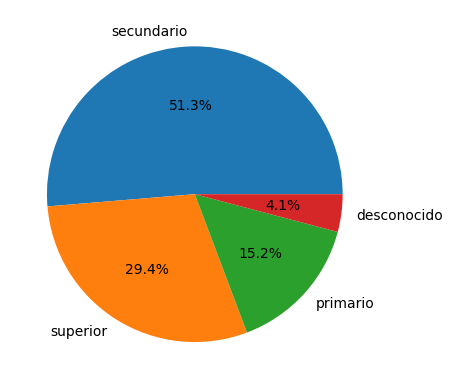

In [21]:
fig, ax = pt.subplots()
ax.pie(data_xls['educacion'].value_counts(), labels=data_xls['educacion'].value_counts().index, autopct='%1.1f%%')
pt.show()

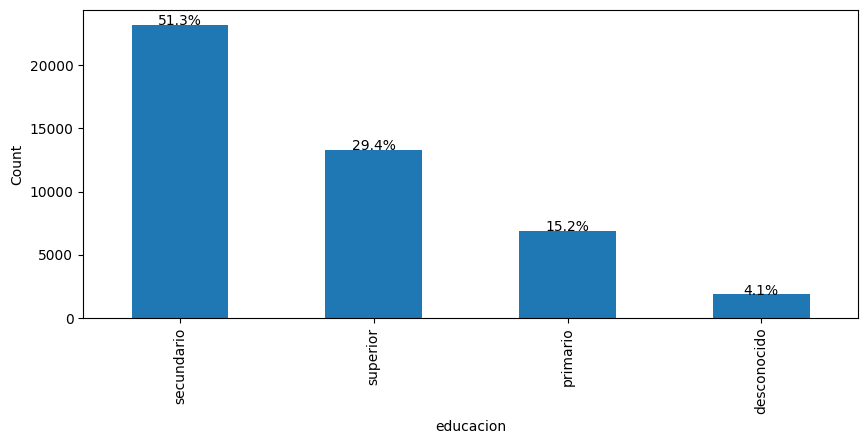

In [22]:
ax = data_xls['educacion'].value_counts().plot.bar(figsize=(10,4))
ax.set_ylabel('Count')

# Add percentages to the bar plot
total = len(data_xls['educacion'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 2
  y = p.get_height()
  ax.annotate(percentage, (x, y), ha='center')

pt.show()

<Axes: xlabel='duracion_seg', ylabel='edad'>

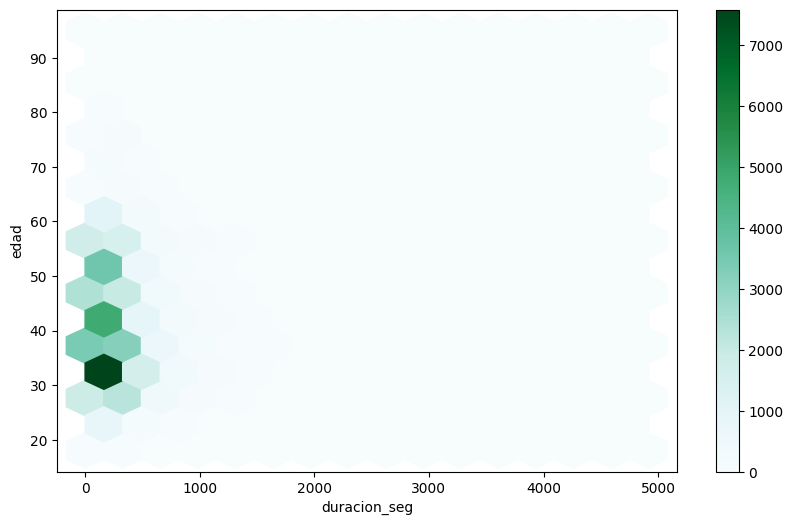

In [23]:
data_xls.plot.hexbin(x='duracion_seg', y='edad', gridsize=15, figsize=(10,6))

In [ ]:
# Calcula la matriz de correlación
# corr = data_xls.corr()



<Axes: xlabel='pres_vivienda', ylabel='edad'>

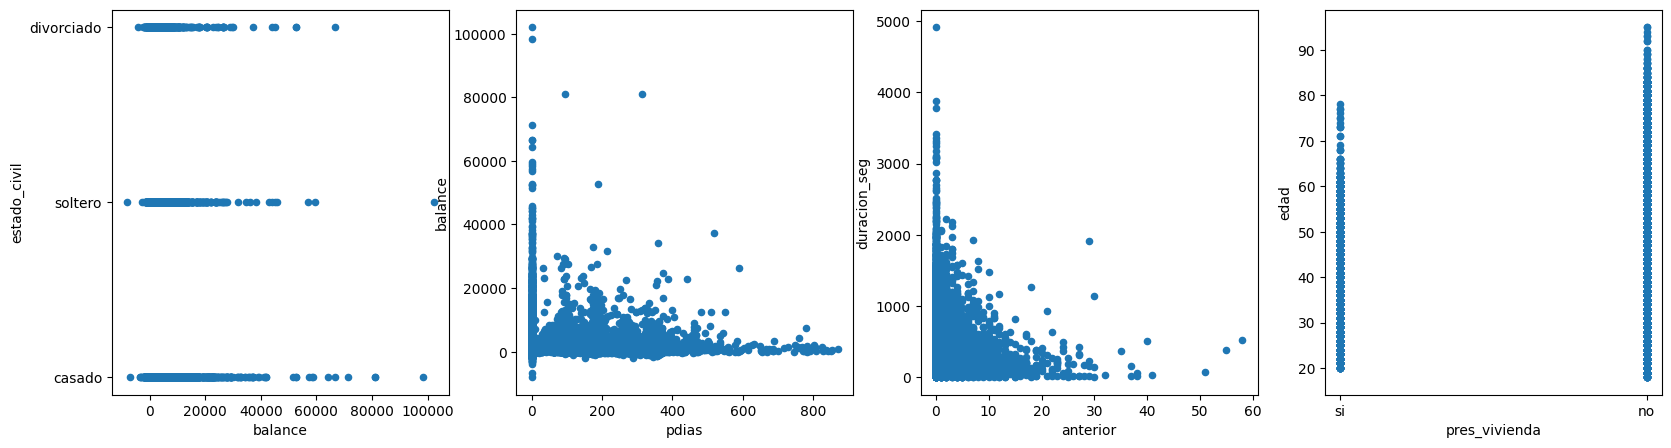

In [38]:
# Graficamos algunas de estas relaciones con el precio
fig, (ax1,ax2,ax3,ax4) = pt.subplots(nrows=1, ncols=4, figsize=(20, 5))
data_xls.plot.scatter(x='balance', y='estado_civil', ax=ax1)
data_xls.plot.scatter(x='pdias', y='balance', ax=ax2)

data_filtrada = data_xls.query("anterior<=100")
data_filtrada.plot.scatter(x='anterior', y='duracion_seg', ax=ax3)
data_filtrada.plot.scatter(x='pres_vivienda', y='edad', ax=ax4)